## Mall Customer Segmentation - Understanding the Data

In a business case, you are a data scientist at a leading consulting company and among their newest clients is a popular chain of malls spread across many countries. The mall wishes to gain a better understanding of its customers to re-design their existing offerings and marketing communications to improve sales in a geographical area.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
data0 = pd.read_csv("Mall_Customers.csv")
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


It can be seen that there is information such as the gender and age of the customer, along with the estimated annual income (annual income (K$)). There is also a spending score calculated by the mall (spending score (1-100)), which shows the amount of spending that has been made by customers in higher malls means higher spend.

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


It can be seen that dataset contains 200 customer data. also see that there are no missing values in the dataset to handle.

#### Renaming columns

In [4]:
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Overall averages show that the average age of the customer is around 39 and the average income is around 61,000 USD. The spend scores seem to be calculated based on percentiles – having a minimum value of 1 and a maximum of 99, which is common with percentiles (scores from 0 to 1 are also common for percentiles). The maximum income is around 137,000 USD. Looking at these values, we do not suspect any outliers in the data. This completes a very high-level understanding of the data.

## Traditional Segmentation of Mall Customers

The mall wants to segment its customers and plans to use the derived segments to improve its marketing campaigns. The business team has a belief that segmenting based on income levels is relevant for their offerings. You are asked to use a traditional, rule-based approach to define customer segments.

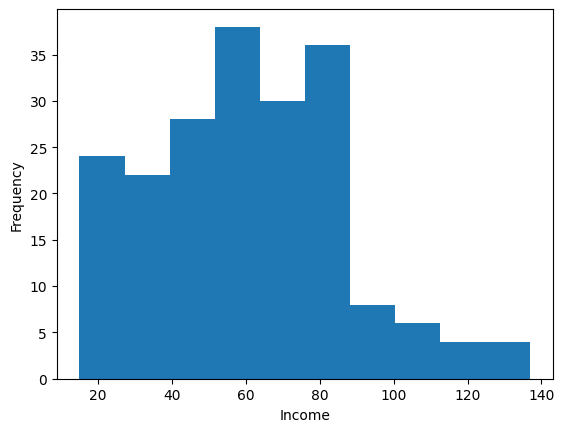

In [6]:
#Plot a histogram of the Income column

data0.Income.plot.hist(color='#1f77b4')
plt.xlabel('Income')
plt.show()

From the Histogram beyond 90k, the frequency in the bins falls sharply and it seems that these customers can naturally be considered a separate group representing high-income customers. A good proportion of customers seems to lie in the 50k-90k range. These can be considered moderate-income customers. Customers earning less than 40k would be low-income customers. We can use these cutoffs to divide the customers into three groups, as in the following figure. The dotted segments denote the cutoffs/thresholds.

Create a new column ‘Cluster’ to have the values ‘Low Income’, ‘Moderate Income’, ‘High earners’ for customers with income in the ranges < 50, 50 – 90, and >= 90 respectively, using the code below.

In [7]:
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                            np.where(data0.Income < 50, \
                            'Low Income', 'Moderate Income'))

In [8]:
data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


The maximum and minimum values for each cluster confirm that the clusters
have been defined as we intended. Most customers lie in the Moderate
Income cluster. You can also see that only 22 customers are marked as
high earners.

## Standardizing Customer Data

standardize the mall customer data
using z-scoring, employing StandardScaler from scikit-learn.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
cols_to_scale = ['Age', 'Income', 'Spend_score']

In [11]:
data_scaled = data0.copy()

In [12]:
data_scaled[cols_to_scale] = scaler.fit_transform\
                             (data0[cols_to_scale])

In [13]:
data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


The mean value for all the columns is practically 0 and the standard deviation
for all is 1. This confirms that the standardization has worked.

### Calculating distance between customers 

The goal is to be able to calculate the similarity between customers.
A similarity calculation is a key step in customer segmentation.

In [14]:
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [15]:
from scipy.spatial.distance import cdist

In [16]:
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

The output shows that the distance between the first and the second customer is
1.63 units, while the distance between the first and the third customer is 1.28
units. The distance between the second and the third customer is 2.92 units.

In [17]:
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

Can be seen that points with values that are similar have lower distances. Such distance calculation is a key step in determining the similarity between entities and is used by machine learning algorithms for clustering.

## k-means Clustering on Mall Customers

K-means clustering is an algorithm that tries to find the best way of grouping data points into k different groups, where k is a parameter given to the algorithm.

In [18]:
#Create a list called cluster_cols containing the Income and Spend_score columns, which will be used for clustering.

cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head()

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


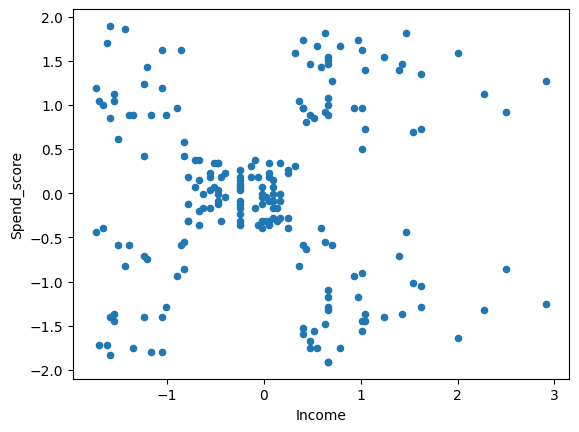

In [19]:
#Visualize the data using a scatter plot

data_scaled.plot.scatter(x='Income', y='Spend_score', \
                         color='#1f77b4')
plt.show()

## Determining the Number of Clusters Using the Elbow Method

In [20]:
from sklearn.cluster import KMeans

X = data_scaled[cluster_cols]

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X)\
                                                    .inertia_
    inertia_scores.append(inertia)

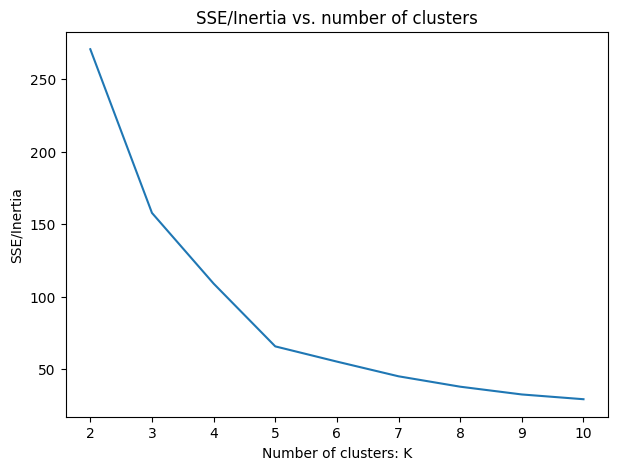

In [21]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='#1f77b4')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

By observing the previous plot, it can be seen that there is a elbow in the plot at K = 5. So, take five as the optimal number of clusters, the best value of K for the Kmeans algorithm.

In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

The model instance is created. Note that no clustering has been performed
on the data yet. n_clusters specifies the number of clusters to create
as 5. Specifying a random state ensures that we get the same results on
repeated executions since the k-means algorithm is not deterministic. 42 is an
arbitrary choice.

In [23]:
model.fit(data_scaled[cluster_cols])

data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [24]:
data_scaled.head()

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2
3,4,Female,-1.137502,-1.700830,1.040418,3
4,5,Female,-0.563369,-1.662660,-0.395980,2


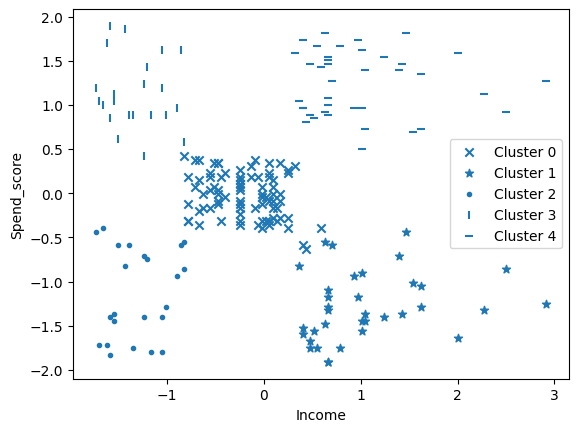

In [25]:
#visualize it to see the points assigned to each cluster

markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = '#1f77b4',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

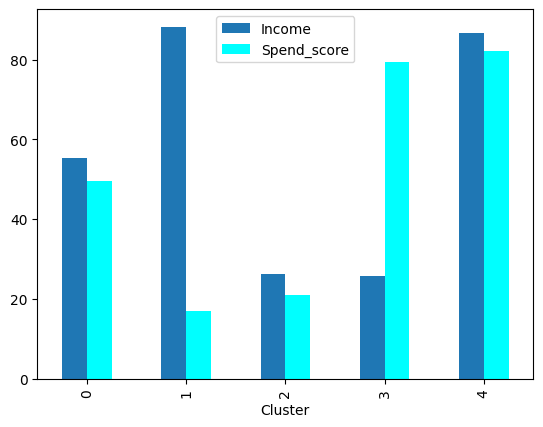

In [26]:
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Income', 'Spend_score']].mean()\
.plot.bar(color=['#1f77b4','aqua'])
plt.show()

• Cluster 0: Moderate-income and moderate spenders

• Cluster 1: High-income and low spenders

• Cluster 2: Low-income and low spenders

• Cluster 3: Low-income and high spenders

• Cluster 4: High-income and high spenders


Conclusion

I think the best strategy would be to target high-income customers. The reason is that some of the high-income customers spend high, while a significant portion of these customers spend low, there may be some things that low-spenders are not satisfied. Improvements to be made in service and quality can increase the spending of high-income customers who come to the store.

This is not the optimal strategy, but it could be an alternative. Since the average spending scores of middle-income customers in this store are also at a medium level, it is difficult to increase their spending to higher levels because their income is not conducive to this, but by making campaigns to increase the number of these customers, the store can increase its profit by acquiring more middle-income customers.